<h1 style="text-align:center;">
    Practica 4
</h1>
<h2 style="text-align:center;">
    Ejericio 2
</h2>
<h3 style="text-align:center;">
   Alumno: Victor Islachin
</h3>

In [20]:
#importamos las librerias de arbol de decision para poder hacer el modelo
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import graphviz
import matplotlib.pyplot as plt
import numpy as np

#importamos tambien el dataset y asi ya no lo descargamos sino que simplemente lo jalamos de la libreria
from sklearn.datasets import load_iris

In [21]:
#cargamos la data en una variable iris
iris = load_iris()

In [26]:
#mostramos todo lo que tiene adentro
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [30]:
#nos da un resumen de toda la data en total hay 150 datos con 4 caracteristicas
iris.data.shape

(150, 4)

In [31]:
#nos dice que hay un total de 150 respuestas quiere decir que esta completo
iris.target.shape

(150,)

In [29]:
#estas son los nombres respuestas de la etiqueta donde 0 es el primer valor del array, 1 el siguiente y termina en 2 para virginica
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [32]:
#mostraremos las caracteristicas o nombres de columna
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

<h2>
    Creación del Modelo
</h2>

In [3]:
#primero separamos la data de entrenamiento y test y les damos los datos y las respuestas
x_train,x_test,y_train, y_test = train_test_split(iris.data,iris.target)

In [33]:
#creamos un variable y le damos el clasificador con una maxima produndidad de 3
arbol = DecisionTreeClassifier(max_depth=3)

In [34]:
#lo entrenamos 
arbol.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

<h2>
    Validamos el Modelo
</h2>

In [35]:
#probamos para calcular el R^2 para saber cuanto de efectivo es con el test
arbol.score(x_test,y_test)

0.9210526315789473

In [36]:
#probamos para calcular el R^2 para saber cuanto de efectivo es con el train
arbol.score(x_train,y_train)

0.9732142857142857

In [37]:
#creamos un grafico para el ver el arbol y lo exportamos
export_graphviz(arbol, out_file='arbol.dot',class_names=iris.target_names, feature_names=iris.feature_names,impurity=False, filled = True)

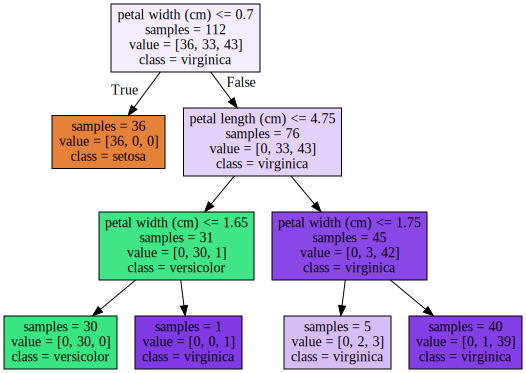

In [38]:
#abrimos el arbol de decision y lo graficamos con la libreria graphviz
with open('arbol.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

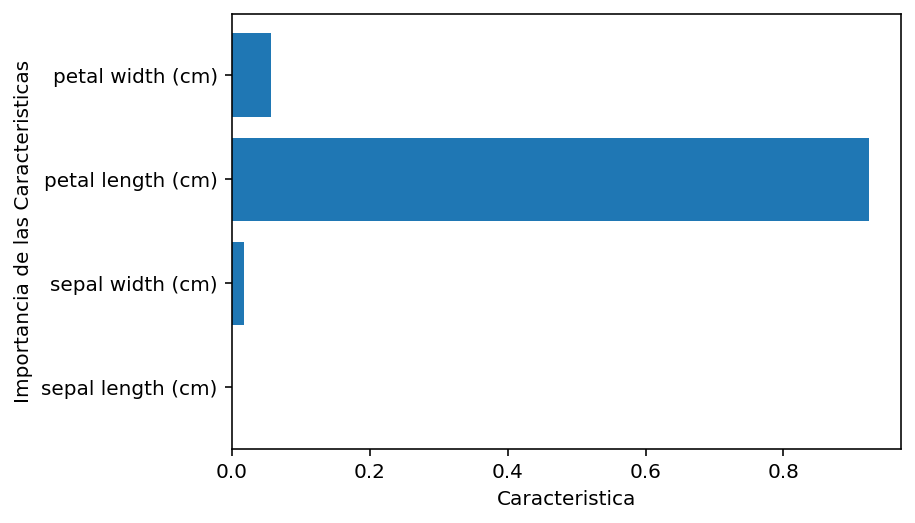

In [10]:
#vemos que caracteristica es la mas importante y lo graficamos con plt
caract = iris.data.shape[1]
plt.barh(range(caract),arbol.feature_importances_)
plt.yticks(np.arange(caract),iris.feature_names)
plt.ylabel("Importancia de las Caracteristicas")
plt.xlabel("Caracteristica")
plt.show()

<h2>
    Creamos un Grafico Mas entendible
</h2>

<function matplotlib.pyplot.show(*args, **kw)>

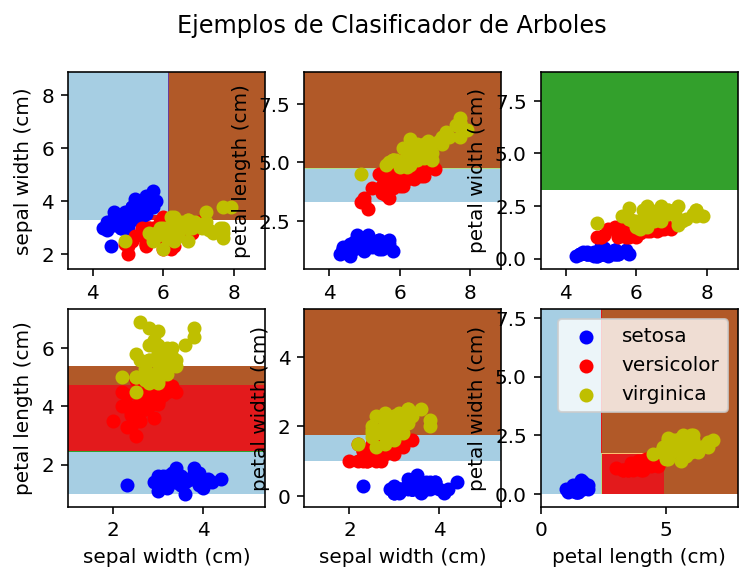

In [39]:
n_classes = 3
plot_colors = "bry"
plot_step =0.02
for pairidx,pair in enumerate([[0,1],[0,2],[0,3],[1,2],[1,3],[2,3]]):
    x = iris.data[:,pair]
    y = iris.target
    
    #entrenar algoritmo
    clf = DecisionTreeClassifier(max_depth=3).fit(x,y)
    plt.subplot(2,3,pairidx+1)
    
    #calcular el maximo y minimo de la data para el grafico
    x_min,x_max = x[: ,0].min() - 1, x[: ,0].max() + 1
    y_min,y_max = x[:,0].min() - 1, x[:,0].max() + 1
    xx,yy = np.meshgrid(np.arange(x_min,x_max,plot_step),
                        np.arange(y_min,y_max,plot_step))
    
    z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    z = z.reshape(xx.shape)
    cs = plt.contourf(xx,yy,z,cmap=plt.cm.Paired)
    #poner los nombres de las caracteristicas en el eje x and y
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")
    
    #colocar los puntos en cada grafico
    for i,color in zip(range(n_classes),plot_colors):
        idx = np.where(y==i)
        plt.scatter(x[idx,0],x[idx,1],c = color, label = iris.target_names[i],cmap=plt.cm.Paired)
        plt.axis("tight")
        
plt.suptitle("Ejemplos de Clasificador de Arboles")
plt.legend()
plt.show
    